# Normal Equation

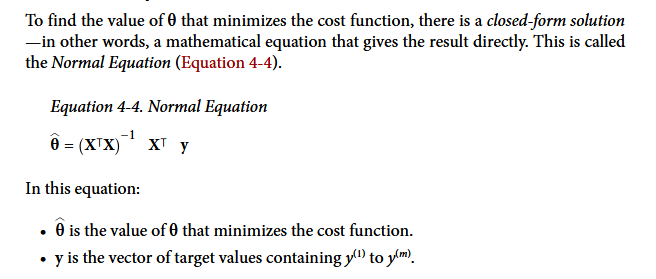

wher3e X is the weights, Such as intercept is 1 so first element of this X must be something that we dont knbow so we will substitue 1 because miltiplying it does not do naything and then according to the number of features

In [1]:
import numpy as np

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

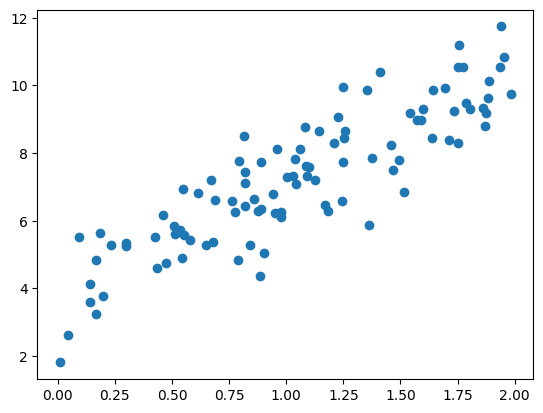

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [7]:
X_b = np.c_[np.ones((100,1)),X]
X_b

array([[1.        , 1.93814507],
       [1.        , 1.06230086],
       [1.        , 0.88637314],
       [1.        , 1.24848445],
       [1.        , 0.6472251 ],
       [1.        , 0.5458735 ],
       [1.        , 1.64250814],
       [1.        , 1.73535339],
       [1.        , 1.71156846],
       [1.        , 0.51259303],
       [1.        , 0.43562938],
       [1.        , 1.12783526],
       [1.        , 0.47299572],
       [1.        , 1.08236808],
       [1.        , 1.24475181],
       [1.        , 0.79076317],
       [1.        , 0.16943336],
       [1.        , 1.14553478],
       [1.        , 0.04281114],
       [1.        , 1.40891123],
       [1.        , 0.55247109],
       [1.        , 0.82063902],
       [1.        , 0.84206729],
       [1.        , 1.88259855],
       [1.        , 1.3640964 ],
       [1.        , 1.51711114],
       [1.        , 0.7936877 ],
       [1.        , 1.75574325],
       [1.        , 0.8596794 ],
       [1.        , 0.97613111],
       [1.

In [8]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))

In [9]:
theta_best

array([[3.81190858],
       [3.28155877]])

In [10]:
X_new = np.array([[0],[2]])

In [11]:
X_new_b = np.c_[np.ones((2,1)),X_new]

In [12]:
y_predict = X_new_b.dot(theta_best)

In [13]:
y_predict

array([[ 3.81190858],
       [10.37502612]])

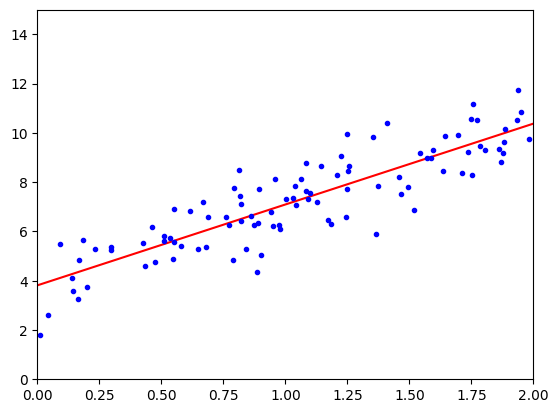

In [14]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### doing the same with linear regression function from scikit learn

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
regressor.intercept_

array([3.81190858])

In [17]:
regressor.coef_

array([[3.28155877]])

The LinearRegression class is based on the scipy.linalg.lstsq() function (the
name stands for “least squares”), which you could call directly:

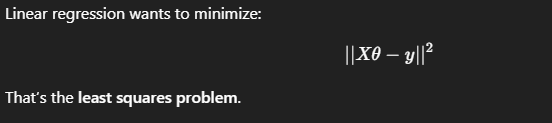

and this function directly minimizes it and can give you the same values

In [18]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [19]:
theta_best_svd

array([[3.81190858],
       [3.28155877]])

This function computes θ = X+y, where 𝐀+ is the pseudoinverse of X (specifically,
the Moore-Penrose inverse). You can use np.linalg.pinv() to compute the
pseudoinverse directly:

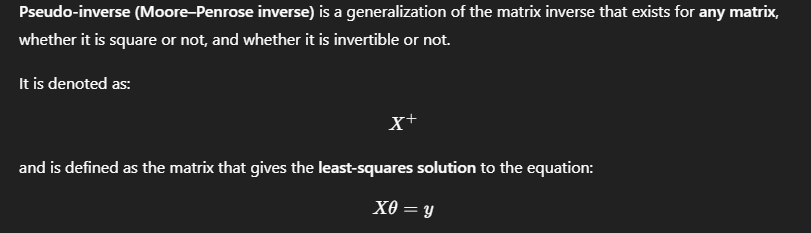

In [21]:
np.linalg.pinv(X_b).dot(y)

array([[3.81190858],
       [3.28155877]])

### Performing Gradient Descent 

##### Batch Gradient Descent


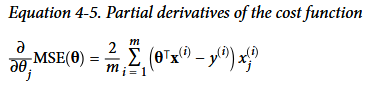

Instead of computing these partial derivatives individually, you can use Equation 4-6
to compute them all in one go

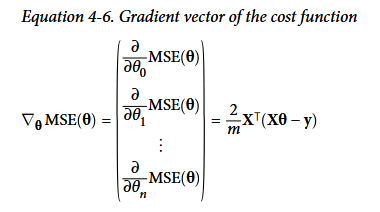

This is also called Gradient Vector

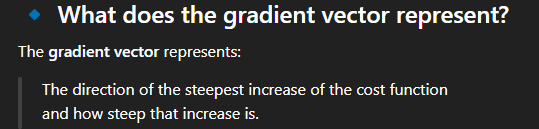

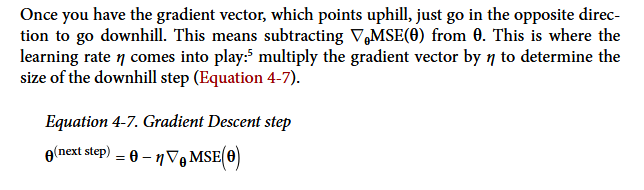

In [27]:
eta = 0.1
m = len(X)
theta = np.random.randn(2, 1)       ## Starting point
iteration = 1000
for i in range(iteration):
    gradient_vector = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradient_vector

In [28]:
theta

array([[3.81190858],
       [3.28155877]])

##### Playing with  learning rate: 

Learning rate : Best can be found through Grid Search
<br>Iterations : A simple solu‐
tion is to set a very large number of iterations but to interrupt the algorithm when the
gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny
number
ϵ (called the tolerance)—because this happens when Gradient Descent has
(almost) reached the minimum.

### Stochastic Gradient Descent 

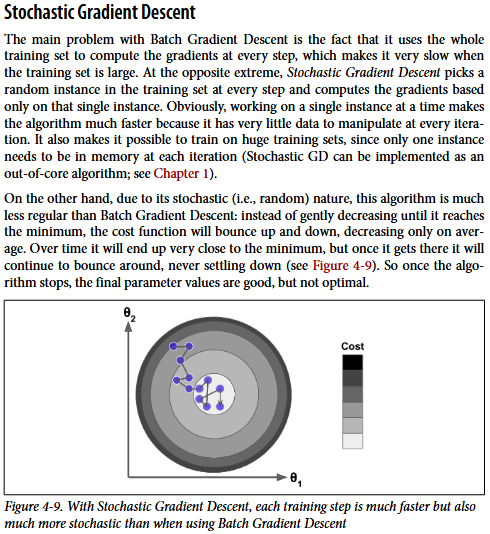

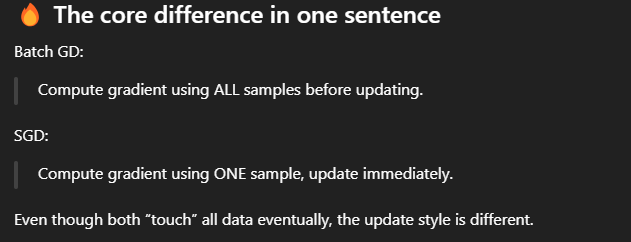

In [30]:
n_epoch = 50
t0,t1 = 50,500
def learning_schedule(t):
    return t0/(t+t1)
theta = np.random.randn(2,1)
for epoch in range(n_epoch):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [31]:
theta

array([[3.80277232],
       [3.1673349 ]])

##### Building a Linear Regression model specifically using SGD Regressor

In [32]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)

In [33]:
sgd.fit(X,y.ravel())

,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [34]:
sgd.intercept_,sgd.coef_

(array([3.88919685]), array([3.40390316]))

### Mini Batch Gradient Descent

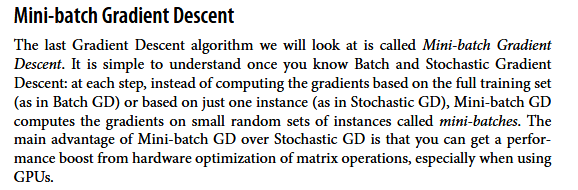

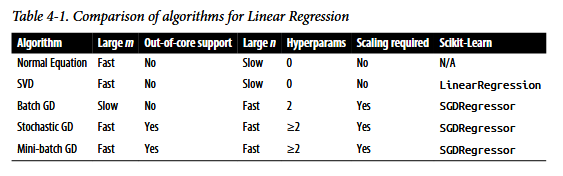